In [410]:
# calculates NDVI from photo

In [868]:
%matplotlib inline
import pandas as pd
import xarray as xr
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO
import glob
import math
import scipy
import sklearn
import pytesseract 
import png

In [866]:
# finds exposure for visual image

x = io.open('/Users/BillVandenberg/Downloads/phenocamdata-3/bozeman/2017/06/bozeman_2017_06_25_051806.meta')
y = x.read(229)
y.split()
z = y[225:228]
vis_exp_num = int(z)

In [865]:
x = io.open('/Users/BillVandenberg/Downloads/phenocamdata-4/bozeman/2017/06/bozeman_IR_2017_06_25_051806.meta')
y = x.read(229)
y.split()
z = y[225:228]
ir_exp_num = int(z)


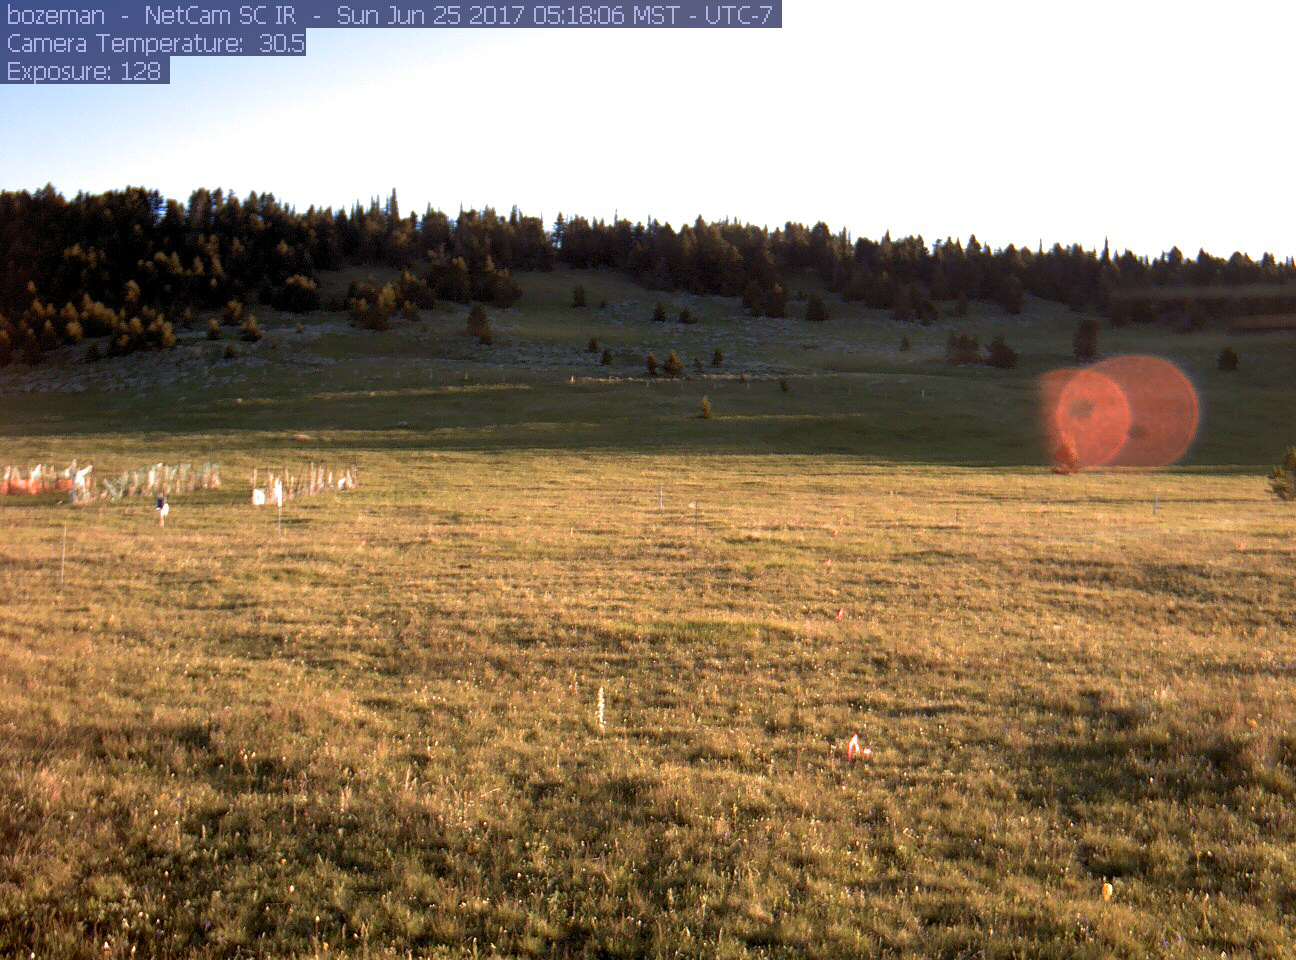

In [855]:
# import visual photo and finds all pixel values

vis_photo = 'https://phenocam.sr.unh.edu/data/archive/bozeman/2017/06/bozeman_2017_06_25_051806.jpg'
response = requests.get(vis_photo)
VIS_img = Image.open(BytesIO(response.content))
width, height = VIS_img.size
vis_pixel_values = list(VIS_img.getdata())
vis_pixel_values = np.array(vis_pixel_values).reshape((width, height, 3))
VIS_img

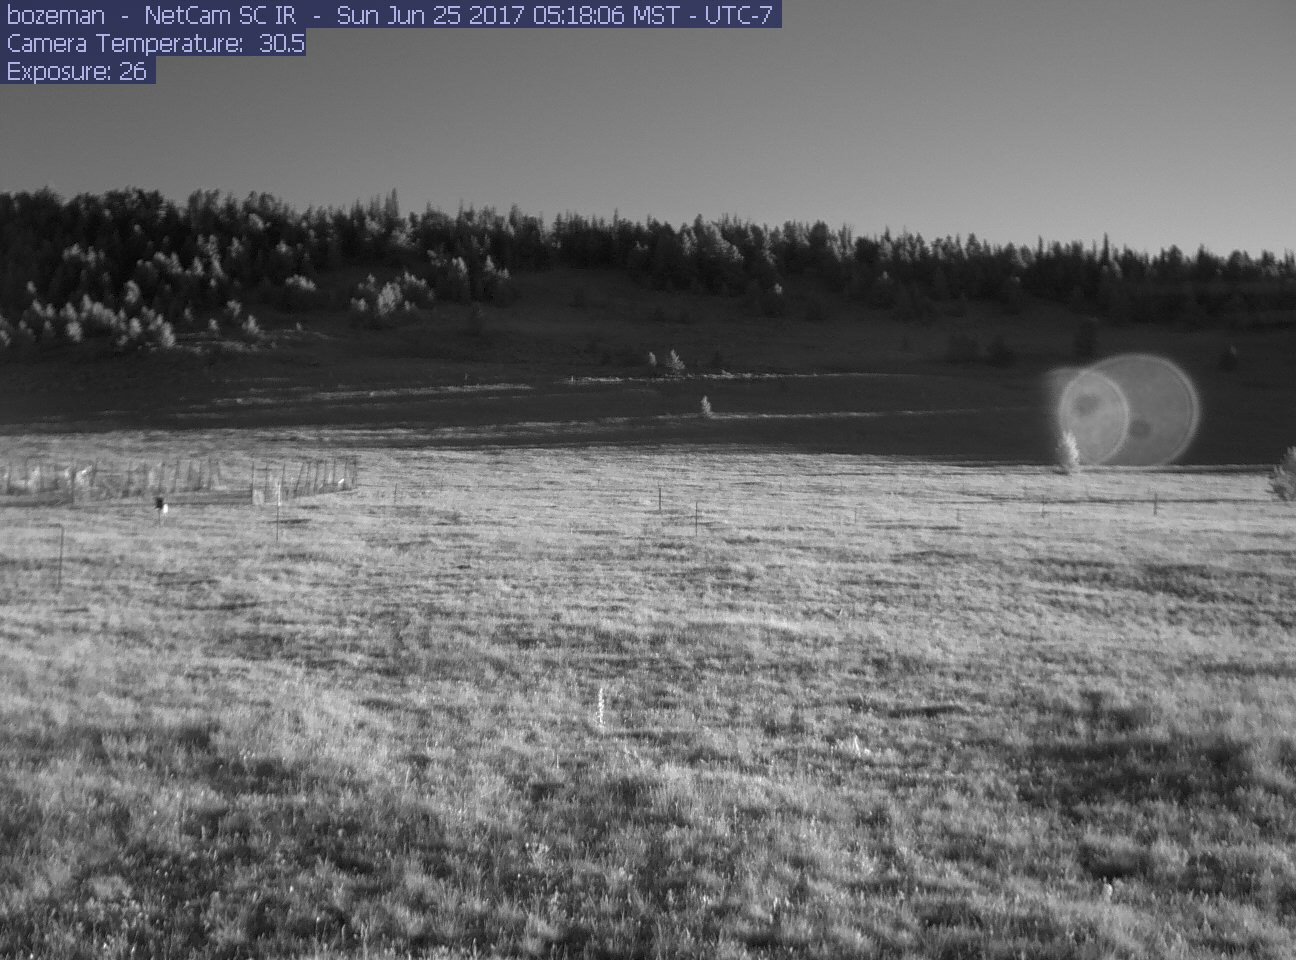

In [856]:
# import IR photo and finds all pixel values

ir_photo = 'https://phenocam.sr.unh.edu/data/archive/bozeman/2017/06/bozeman_IR_2017_06_25_051806.jpg'
response = requests.get(ir_photo)
IR_img = Image.open(BytesIO(response.content))
width, height = IR_img.size
IR_pixel_values = list(IR_img.getdata())
IR_pixel_values = np.array(IR_pixel_values).reshape((width, height, 3))
IR_img

In [857]:
# calculate r', blue values, green values

x=0
y=0
width,height = VIS_img.size

red_array = np.zeros((width,height))
for x in range (width):
    for y in range (height):
        red_array[x,y] = vis_pixel_values[x,y,0]
r_prime = red_array/math.sqrt(vis_exp_num)

green_array = np.zeros((width,height))
for x in range (width):
    for y in range (height):
        green_array[x,y] = vis_pixel_values[x,y,1]
        
blue_array = np.zeros((width,height))
for x in range (width):
    for y in range (height):
        blue_array[x,y] = vis_pixel_values[x,y,2]

In [858]:
# calculating all IR values

x=0
y=0
width,height = IR_img.size
IR_array = np.zeros((width,height))
for x in range (width):
    for y in range (height):
        IR_array[x,y] = IR_pixel_values[x,y,0]

In [859]:
# finding x'

z = (red_array + green_array + blue_array) + IR_array
z_prime = z/math.sqrt(ir_exp_num)

y_array = 0.30*red_array + 0.59*green_array + 0.11*blue_array
y_prime = y_array/math.sqrt(ir_exp_num)

x_prime = z_prime - y_prime

In [860]:
# camera ndvi average

np.seterr(divide='ignore', invalid='ignore')
camera_ndvi = ((x_prime-r_prime) / (x_prime+r_prime))

camera_ndvi = xr.DataArray(camera_ndvi)

In [861]:
ndvi_mean = camera_ndvi.mean()
ndvi_mean = float(ndvi_mean)

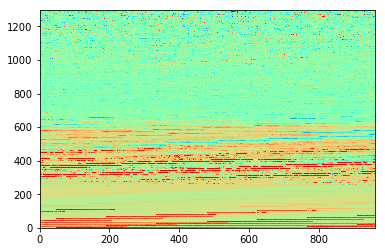

In [877]:
x = plt.pcolormesh(camera_ndvi, cmap=plt.cm.rainbow, vmin = ndvi_mean-0.15, vmax = ndvi_mean+0.1)